In [1]:
# Importacion de las librerias de interes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# EXTRACCIÓN DE DATOS: Lectura de los datos del dataset y su transformacion en un DataFrame
df = pd.read_csv('Medallas_potenciadoras.csv')
df.head()

,Pokemon,Nivel,Color,Color_1,Color_2,A,AE,D,DE,PS,IGC,VD,TRE
0,Bulbasaur,Plata,Verde,Verde,NaN,NaN,2.4,NaN,NaN,-40.0,NaN,NaN,NaN
1,Ivysaur,Oro,Verde,Verde,NaN,NaN,3.0,-5.0,NaN,NaN,NaN,NaN,NaN
2,Venusaur,Cobre,Verde,Verde,NaN,-1.2,1.8,NaN,NaN,NaN,NaN,NaN,NaN
3,Charmander,Oro,Roja,Roja,NaN,-2.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN
4,Charmeleon,Plata,Roja,Roja,NaN,NaN,NaN,NaN,-4.0,40.0,NaN,NaN,NaN


In [3]:
# Lista de las habilidades de las medallas potenciadoras
feature_plot = ['Ataque','Ataque Especial','Defensa','Defensa Especial','Puntos de Salud','Índice de Golpe Crítico','Velocidad de Despalzamiento','Tiempo de Recarga']

# Lista de los codigos de habilidades de las medallas potenciadoras
feature_list = ['A','AE','D','DE','PS','IGC','VD','TRE']

# Lista de los codigos normalizados de las medallas potenciadoras
feature_lstn = ['A / 3.0','AE / 3.6','D / 5','DE / 5','PS / 50','IGC / 0.6','VD / 35','TRE / 0.5']

# Lista de los códigos de color para las habilidades de las medallas potenciadoras
feature_colr = ['red','orange','yellow','lime','blue','magenta','sienna','deeppink']

# Lista de colores de las medallas potenciadoras
color_list = ['Gris','Rosa','Negra','Amarilla','Roja','Morada','Blanca','Marrón','Verde','Azul']

# Lista de los codigos de color de los colores de medallas potenciadoras
color_plot = ['gray','pink','black','yellow','red','purple','cyan','brown','green','blue']


In [4]:
# PRETRATAMIENTO DE DATOS: Extracción de las variables de interés
features = df[feature_list].replace(np.nan, 0)
features.head()

,A,AE,D,DE,PS,IGC,VD,TRE
0,0.0,2.4,0.0,0.0,-40.0,0.0,0.0,0.0
1,0.0,3.0,-5.0,0.0,0.0,0.0,0.0,0.0
2,-1.2,1.8,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-4.0,40.0,0.0,0.0,0.0


In [5]:
# PRETRATAMIENTO DE DATOS: Normalización simple de las variables de interés
features_norm = features/abs(features).max()
features_norm.head()

,A,AE,D,DE,PS,IGC,VD,TRE
0,0.000000,0.666667,0.0,0.0,-0.8,0.0,0.0,0.0
1,0.000000,0.833333,-1.0,0.0,0.0,0.0,0.0,0.0
2,-0.400000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.666667,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,-0.8,0.8,0.0,0.0,0.0


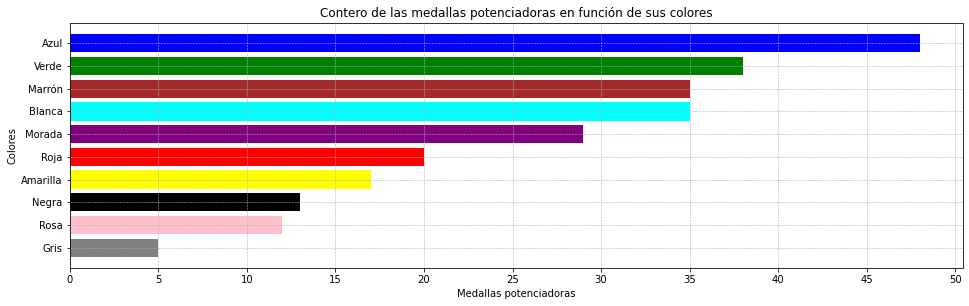

In [6]:
# VISUALIZACION DE DATOS 1: Contero de las medallas potenciadoras en función de sus colores

# Gráfico de barras
fig_0, ax_0 = plt.subplots(figsize=(16,9/2))

# Variables
variables_0 = df[['Pokemon','Color_1']].groupby(by='Color_1').count().sort_values('Pokemon')['Pokemon']

# Categorias
categories_0 = df[['Pokemon','Color_1']].groupby(by='Color_1').count().sort_values('Pokemon').index

# Índices
indices_0 = np.arange(len(categories_0))

ax_0.barh(y = indices_0, width = variables_0, color = color_plot)

ax_0.set_title('Contero de las medallas potenciadoras en función de sus colores') 
ax_0.set_xlabel('Medallas potenciadoras')
ax_0.set_ylabel('Colores')

ax_0.set_xticks(np.arange(0,55,5))
ax_0.set_yticks(indices_0)
ax_0.set_yticklabels(categories_0)

ax_0.grid(linestyle='--', linewidth=0.55)

plt.show()
plt.close()

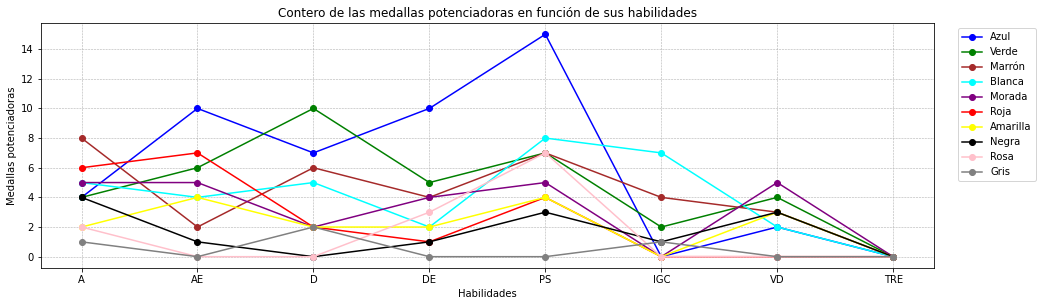

In [7]:
# VISUALIZACION DE DATOS 2: Contero de las medallas potenciadoras en función de sus habilidades

# Gráfico de líneas
fig_1, ax_1 = plt.subplots(figsize=(16,9/2))

# Variables
variables_1 = features_norm[features>0].set_index(df['Color_1']).groupby(by='Color_1').count().loc[color_list]

# Categorias
categories_1 = feature_list

# Índices
indices_1 = np.arange(len(categories_1))

for i in range(1,len(color_list)+1):
    ax_1.plot(indices_1, variables_1.loc[color_list[-i]], 'o-', c = color_plot[-i], label = color_list[-i])

ax_1.set_title('Contero de las medallas potenciadoras en función de sus habilidades')
ax_1.set_xlabel('Habilidades')
ax_1.set_ylabel('Medallas potenciadoras')

ax_1.set_xticks(indices_1)
ax_1.set_xticklabels(categories_1)

ax_1.legend(loc='upper right', bbox_to_anchor=(1.12, 1.00))
ax_1.grid(linestyle='--', linewidth=0.55)

plt.show()
plt.close()

In [22]:
# SELECCIÓN DE DATOS 1:

# Lista de colores y habilidades de medallas potenciadoras de interes
colors_features_chosen = [['Azul','A'],['Verde','AE'],['Roja','AE']]

# Lista de los codigos de los pokemones de interés
pokemon_codes = []

for color_feature in colors_features_chosen:
    filter_1 = df['Color_1'] == color_feature[0]
    filter_2 = df[filter_1][color_feature[1]]>0
    pokemon_codes.append(list(df[filter_1][filter_2].sort_values(by = color_feature[1], ascending = False).index))

# Lista de los nombres de los pokemones de interés
pokemon_list = []

for codes in pokemon_codes:
    pokemon_list.append(list(df.loc[codes]['Pokemon']))    

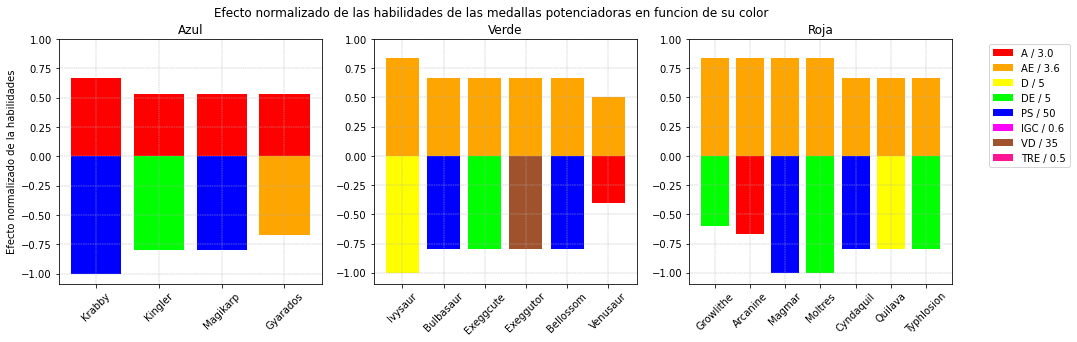

In [23]:
# VISUALIZACION DE DATOS 3: Efecto normalizado de las habilidades de las medallas potenciadoras en funcion de su color

# Gráfico de barras
fig_3, ax_3 = plt.subplots(ncols=len(colors_features_chosen), figsize=(16,9/2))

fig_3.suptitle('Efecto normalizado de las habilidades de las medallas potenciadoras en funcion de su color')

for i in range(len(colors_features_chosen)):
    # Variaibles
    variables_3i = features_norm.loc[pokemon_codes[i]]
    
    # Categorias
    categories_3i = pokemon_list[i]
    
    # Índices
    indices_3i = np.arange(len(categories_3i))
    
    for j in range(len(feature_list)):
        ax_3[i].bar(x = indices_3i, height = variables_3i[feature_list[j]], color = feature_colr[j], label = feature_lstn[j])
    
    ax_3[i].set_title(colors_features_chosen[i][0])
    
    ax_3[i].set_xticks(indices_3i)
    ax_3[i].set_xticklabels(categories_3i, rotation=45)
    ax_3[i].set_yticks(np.arange(-1.00,1.25,0.25))
    
    ax_3[i].grid(linestyle='--', linewidth=0.45)

ax_3[0].set_ylabel('Efecto normalizado de la habilidades')
plt.legend(loc='upper right', bbox_to_anchor=(1.47, 1.00))

plt.show()
plt.close()

In [10]:
# SELECCIÓN DE DATOS 2:

# Lista de los nombres de los pokemones escogidos
pokemon_chosen_list  = ['Squirtle','Wartortle','Blastoise','Growlithe','Magmar','Moltres','Ivysaur','Bulbasaur','Exeggcute','Bellosson']

# Lista de los códigos de los pokemones escogidos
pokemon_chosen_codes = list(df.loc[df['Pokemon'].isin(pokemon_chosen_list)].index)

# Sumatoria de los efectos normalizados de las medallas escogidas
sum_efect_norm = features_norm.iloc[pokemon_chosen_codes].sum()

In [11]:
# SELECCIÓN DE DATOS 1:

# Lista de colores y habilidades de medallas potenciadoras de interes
colors_features_chosen = [('Azul','AE'),('Roja','AE'),('Verde','AE')]

# Lista de los codigos de los pokemones de interés
pokemon_codes = []

for color_feature in colors_features_chosen:
    filter_1 = df['Color_1']== color_feature[0]
    filter_2 = df[filter_1][color_feature[1]]>0
    pokemon_codes.extend(df[filter_1][filter_2].sort_values(by = color_feature[1] ,ascending = False).index)

# Lista de los nombres de los pokemones de interés
pokemon_list  = list(df.loc[pokemon_codes]['Pokemon'])

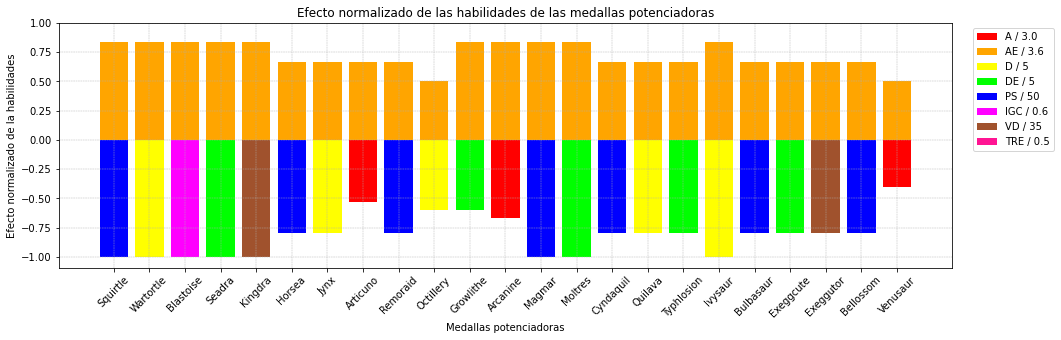

In [12]:
# VISUALIZACION DE DATOS 3: Efecto normalizado de las medallas potenciadoras en funcion de sus habilidades

# Gráfico de barras
fig_2, ax_2 = plt.subplots(figsize=(16,9/2))

# Variables
variables_2 = features_norm.loc[pokemon_codes]

# Categorias
categories_2 = pokemon_list

# Indices
indices_2 = np.arange(len(categories_2))

for i in range(len(feature_list)):
    bar = ax_2.bar(x = indices_2, height = variables_2[feature_list[i]], color = feature_colr[i], label = feature_lstn[i])

ax_2.set_title('Efecto normalizado de las habilidades de las medallas potenciadoras')
ax_2.set_xlabel('Medallas potenciadoras')
ax_2.set_ylabel('Efecto normalizado de la habilidades')

ax_2.set_xticks(indices_2)
ax_2.set_xticklabels(categories_2, rotation=45)
ax_2.set_yticks(np.arange(-1.00,1.25,0.25))

ax_2.legend(loc='upper right', bbox_to_anchor=(1.12, 1.00))
ax_2.grid(linestyle='--', linewidth=0.45)

plt.show()

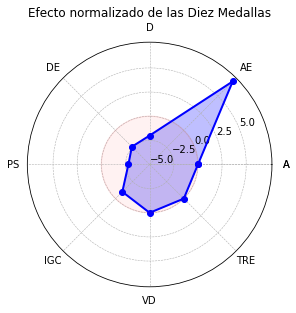

In [13]:
# VISUALIZACION DE DATOS 5: Efecto normalizado total de la seleccion de dies medallas potenciadoras

# Variables
angles_31 = np.linspace(0, 2*np.pi, len(feature_list)+1)
radius_31 = np.concatenate((sum_efect_norm,[sum_efect_norm[0]]))
angles_32 = np.linspace(0, 2*np.pi, 100)  # Ángulos para generar la circunferencia
radius_32 = np.zeros_like(angles_32)  # Radio constante igual a 1

# Categorias
categories_3 = np.concatenate((feature_list,[feature_list[0]]))

indices_3 = [-5,-2.5,0,2.5,5]

# Gráfico polar
fig_3 = plt.figure(figsize=(16,9/2)) 
ax_3 = fig_3.add_subplot(polar=True)

ax_3.plot(angles_31, radius_31, 'o-', linewidth=2, color = 'b')
ax_3.fill(angles_31, radius_31, color = 'b', alpha = 0.25)
ax_3.plot(angles_32, radius_32, color = 'r', alpha = 0.05)
ax_3.fill(angles_32, radius_32, color = 'r', alpha = 0.05)

ax_3.set_title('Efecto normalizado de las Diez Medallas')
ax_3.set_thetagrids(angles_31*180/np.pi, labels = categories_3)
ax_3.set_rticks(indices_3)


ax_3.grid(True, linestyle='--', linewidth=0.55)

plt.show()
plt.close()

In [185]:
def iteraciones(n):
    matriz=[]
    for i in range(n):
        fila = [(i + j) % n for j in range(n)]
        matriz.append(tuple(fila))
    return matriz

In [186]:
## MACHINE LEARNING (ML): Seleccion de medallas potenciadores con las mejores habilidades

## Variable de entrada
feature_to_maximize = ['A','AE','D','DE','VD']
# feature_to_maximize: Lista con las habilidades que se desea maximizar su efecto (minimo dos habilidades, maximo 5, recomendable 3).

## Variable de salida
indexes = []
# indexes: Lista con los indices de las medallas potenciadoras con las mejores habilidades 

## Variables internas del programa de ML
number_of_analysis = len(feature_to_maximize)
# number_of_analysis: Numero de analisis a realizar por el programa

# Fn: Filtros del DataFrame


orden = iteraciones(number_of_analysis)

if number_of_analysis==1:
    # Filtros
    F1 = feature_analysis[feature_to_maximize[orden[i][0]]]>0
    
    # Lista
    indexes.extend(feature_analysis[F1].sort_values(by=feature_to_maximize[orden[i][0]]).tail(10).index)

elif number_of_analysis==2:
    
    for i in range(number_of_analysis):
        # Filtros
        F1 = feature_analysis[feature_to_maximize[orden[i][0]]]>0
        F2 = feature_analysis[F1][feature_to_maximize[orden[i][1]]]==0
        
        # Lista
        indexes.extend(feature_analysis[F1][F2].sort_values(by=feature_to_maximize[orden[i][0]]).tail(5).index)

elif number_of_analysis==3:
    
    for i in range(number_of_analysis):
        # Filtros
        F1 = feature_analysis[feature_to_maximize[orden[i][0]]]>0
        F2 = feature_analysis[F1][feature_to_maximize[orden[i][1]]]==0
        F3 = feature_analysis[F1][F2][feature_to_maximize[orden[i][2]]]==0
            
        indexes.extend(list(feature_analysis[F1][F2][F3].sort_values(by=feature_to_maximize[orden[i][0]]).tail(4).index))
    
    indexes.pop(7)
    indexes.pop(8)   
        
elif number_of_analysis==4:
    
    for i in range(number_of_analysis):
        # Filtros
        F1 = feature_analysis[feature_to_maximize[orden[i][0]]]>0
        F2 = feature_analysis[F1][feature_to_maximize[orden[i][1]]]==0
        F3 = feature_analysis[F1][F2][feature_to_maximize[orden[i][2]]]==0
        F4 = feature_analysis[F1][F2][F3][feature_to_maximize[orden[i][3]]]==0
        
        indexes.extend(feature_analysis[F1][F2][F3][F4].sort_values(by=feature_to_maximize[orden[i][0]]).tail(3).index)

    indexes.pop(11)
    indexes.pop(8)

elif number_of_analysis==5:
    
    for i in range(number_of_analysis):
        # Filtros
        F1 = feature_analysis[feature_to_maximize[orden[i][0]]]>0
        F2 = feature_analysis[F1][feature_to_maximize[orden[i][1]]]==0
        F3 = feature_analysis[F1][F2][feature_to_maximize[orden[i][2]]]==0
        F4 = feature_analysis[F1][F2][F3][feature_to_maximize[orden[i][3]]]==0
        F5 = feature_analysis[F1][F2][F3][F4][feature_to_maximize[orden[i][4]]]==0
        
        # Lista
        indexes.extend(feature_analysis[F1][F2][F3].sort_values(by=feature_to_maximize[orden[i][0]]).tail(2).index)

NameError: name 'feature_analysis' is not defined

In [189]:
# VISUALIZACION DE DATOS: Numero de medallas con efectos positivos y negativos clasificadas por color

# Variables
variable_1 = features[features>0].groupby(by='Color_1').count().loc[color_list]['PS']
variable_2 = features[features<0].groupby(by='Color_1').count().loc[color_list]['PS']

# Categorias
categorias = ['Blanca','Rosa','Negra','Amarilla','Roja','Morada','Gris','Marrón','Verde','Azul']

ancho = 0.35
indice = np.arange(len(categorias))

# Gráfico de barras
fig, ax = plt.subplots()

rects1 = ax.barh(y = indice - ancho/2, width = variable_1, height= ancho, color ='b', label='Positivo')
rects2 = ax.barh(y = indice + ancho/2, width = variable_2, height= ancho, color ='r', label='Negativo')

ax.set_xlabel('Numero de medallas')
ax.set_ylabel(feature_dic['PS'])
ax.set_title('Numer de medallas con efectos positivo y negativo')
ax.set_yticks(indice)
ax.set_yticklabels(categorias)
ax.legend()
ax.grid()

plt.show()

KeyError: 'Color_1'

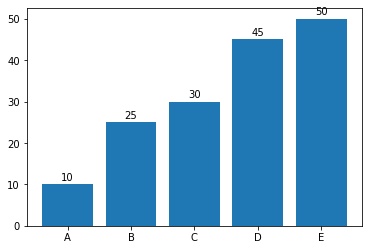

In [190]:
import matplotlib.pyplot as plt

# Datos de ejemplo
valores = [10, 25, 30, 45, 50]
etiquetas = ['A', 'B', 'C', 'D', 'E']

# Crear un gráfico de barras
fig, ax = plt.subplots()
ax.bar(etiquetas, valores)

# Agregar los valores a las barras
for i, valor in enumerate(valores):
    ax.text(i, valor + 1, str(valor), ha='center')

# Mostrar el gráfico
plt.show()

In [191]:
sns.heatmap(feature_analysis.corr())

NameError: name 'feature_analysis' is not defined

In [192]:
feature_analysis.corr()

NameError: name 'feature_analysis' is not defined

In [193]:
df = pd.DataFrame({'ColumnaA': [10, 20, 30, 40, 50]}, index=['A', 'B', 'C', 'D', 'E'])

# Valores para buscar en el orden deseado
valores_busqueda = [40, 30, 10]

# Obtener los índices en el orden deseado
indices = df.loc[df['ColumnaA'].isin(valores_busqueda)].sort_values(by='ColumnaA').index.tolist()

print(indices)

['A', 'C', 'D']


In [194]:
df

,ColumnaA
A,10
B,20
C,30
D,40
E,50


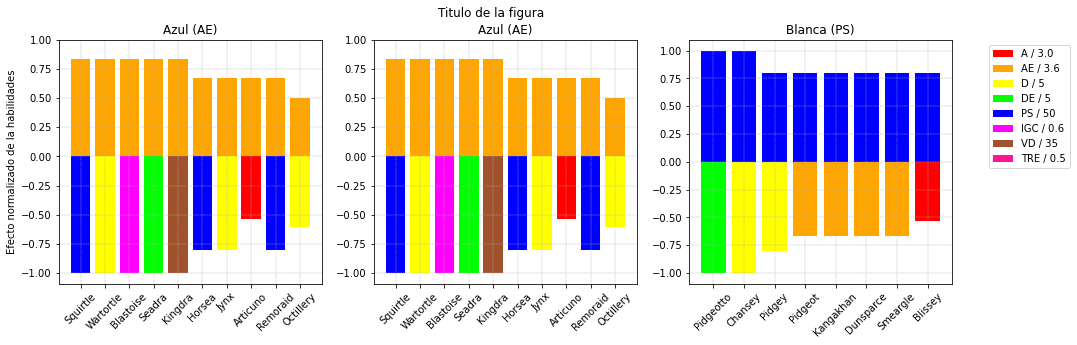

In [223]:
# VISUALIZACION DE DATOS 3: Efecto normalizado de las medallas potenciadoras en funcion de sus habilidades

# Gráfico de barras
fig, ax = plt.subplots(ncols=len(colors_features_chosen), figsize=(16,9/2))

fig.suptitle('Titulo de la figura')

for i in range(len(colors_features_chosen)):
    # Variaibles
    variables_3i = features_norm.loc[pokemon_codes[i]]
    
    # Categorias
    categories_3i = pokemon_list[i]
    
    # Índices
    indices_3i = np.arange(len(categories_3i))
    
    for j in range(len(feature_list)):
        ax[i].bar(x = indices_3i, height = variables_3i[feature_list[j]], color = feature_colr[j], label = feature_lstn[j])
    
    ax[i].set_title(colors_features_chosen[i][0]+' ('+colors_features_chosen[i][1]+')')
    
    ax[i].set_xticks(indices_3i)
    ax[i].set_xticklabels(categories_3i, rotation=45)
    ax[i].set_yticks(np.arange(-1.00,1.25,0.25))
    
    ax[i].grid(linestyle='--', linewidth=0.45)

ax[0].set_ylabel('Efecto normalizado de la habilidades')
plt.legend(loc='upper right', bbox_to_anchor=(1.47, 1.00))

plt.show()
plt.close()

In [128]:
# VISUALIZACION DE DATOS 3: Efecto normalizado de las medallas potenciadoras en funcion de sus habilidades

# Variables
variables_2 = features_norm.loc[pokemon_codes]

# Categorias
categories_2 = pokemon_list

# Indices
indices_2 = np.arange(len(categories_2))

# Gráfico de barras
fig_2, ax_2 = plt.subplots(figsize=(16,9/2))

for i in range(len(feature_list)):
    bar = ax_2.bar(x = indices_2, height = variables_2[feature_list[i]], color = feature_colr[i], label = feature_lstn[i])

ax_2.set_title('Efecto normalizado de las habilidades de las medallas potenciadoras')
ax_2.set_xlabel('Medallas potenciadoras')
ax_2.set_ylabel('Efecto normalizado de la habilidades')

ax_2.set_xticks(indices_2)
ax_2.set_xticklabels(categories_2, rotation=45)
ax_2.set_yticks(np.arange(-1.00,1.25,0.25))

ax_2.legend(loc='upper right', bbox_to_anchor=(1.12, 1.00))
ax_2.grid(linestyle='--', linewidth=0.45)

plt.show()

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: unhashable type: 'list'

In [19]:
for i in range(len(colors_features_chosen)):
    print(colors_features_chosen[i])

('Azul', 'AE')
('Roja', 'AE')
('Verde', 'AE')
